In [1]:
import networkx as nx
import matplotlib.pyplot as plt

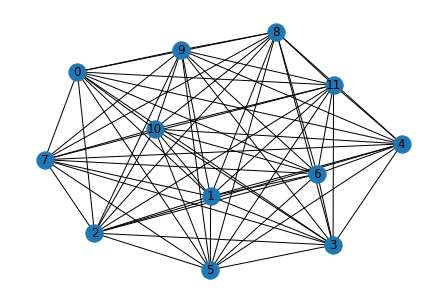

In [3]:
cG = nx.complete_graph(12)
nx.draw(cG, with_labels = True)
plt.savefig('completeGraph.png')

In [4]:
G = nx.Graph()
G.add_node(1)
l1 = [2,3,4,5,6]
G.add_nodes_from(l1)

n1= [ 'A', 'B', 'C', 'D']
G.add_nodes_from(n1)

In [5]:
G.add_edge( 1,2)
G.add_edge('A','B')
edge_list = [(1,6), (2,3), (3,4), (2,6), (6,5) ]
edge_list2 = [ ('A', 'D'), ('B', 'C'), ('B', 'D')]
G.add_edges_from(edge_list)
G.add_edges_from(edge_list2)

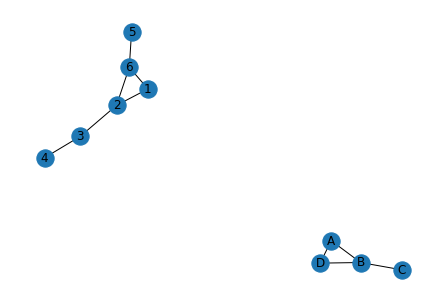

In [6]:
nx.draw(G, with_labels = True)

In [7]:
G.nodes

NodeView((1, 2, 3, 4, 5, 6, 'A', 'B', 'C', 'D'))

In [114]:
G.edges

EdgeView([(1, 2), (1, 6), (2, 3), (2, 6), (3, 4), (5, 6), ('A', 'B'), ('A', 'D'), ('B', 'C'), ('B', 'D')])

In [8]:
G.order()

10

In [9]:
G.degree

DegreeView({1: 2, 2: 3, 3: 2, 4: 1, 5: 1, 6: 3, 'A': 2, 'B': 3, 'C': 1, 'D': 2})

In [10]:
print(G.neighbors(2))
print(list(G.neighbors(2)))

[1, 3, 6]


In [11]:
G.number_of_edges()

10

In [129]:
nb_edges = G.number_of_edges()
nb_edges

10

In [14]:
total = 0
for n in G.nodes():
    nb  = G.degree(n) 
    total += nb
print(total)

20


In [15]:
G.edges()


EdgeView([(1, 2), (1, 6), (2, 3), (2, 6), (3, 4), (5, 6), ('A', 'B'), ('A', 'D'), ('B', 'C'), ('B', 'D')])

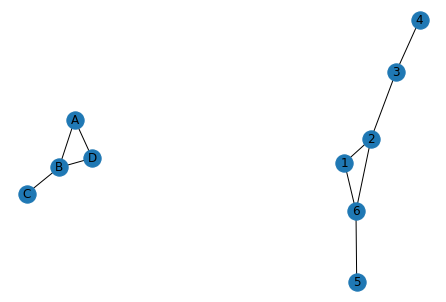

In [16]:
G_from_file = nx.read_edgelist('./graph.edges', nodetype=str)
nx.draw(G_from_file, with_labels = True)

In [17]:
nx.write_edgelist(G, "graph.edges2")

In [51]:
nx.write_graphml_lxml(G, "./graph.graphml")

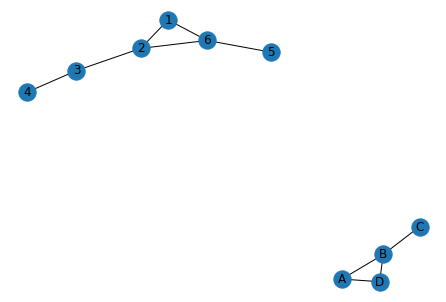

In [52]:
nx.draw(G, with_labels = True)

In [23]:
l = set(nx.bfs_edges(G,5))
print('BFS: ', l)

BFS:  {(6, 2), (3, 4), (6, 1), (2, 3), (5, 6)}


In [22]:
l = set(nx.dfs_edges(G,1))
print('DFS', l)

DFS {(1, 2), (3, 4), (6, 5), (2, 3), (2, 6)}


In [20]:
#13
def is_connected(G):
    Nodes_set =set(G.nodes())
    rand_node1 = Nodes_set.pop()
#dfs_edges  return list of tuples [ (a,b), (c,d), ...] take 2nd element b,d,  and add the first start element and test
#and transfrom to set
    nb_components = 0
    visited = set(item[1] for item in list(nx.dfs_edges(G,rand_node1)))                      
    visited.add(rand_node1) #visited does not contain the start node
    Nodes_set.add(rand_node1) # rand_node was poped from Nodes_set
    
    if visited == Nodes_set: # if the visited nodes are equal to whole graph
        print("The Graph is connected.")
        print("\nThe graph contains one component.")
    else:
        print("The Graph is not connected, these are the components:\n")

        Nodes_set.add(rand_node1)
        i = 1 
        while len(Nodes_set)!=0:
            visited = {}
            rand_node = Nodes_set.pop()
            visited = set( item[1] for item in list(nx.dfs_edges(G,rand_node)))
            visited.add(rand_node)
            print("The component number" , i , "is: ", visited)
            nb_components += 1
            i += 1
            Nodes_set = Nodes_set - visited
        print("\nThe graph contains ", nb_components, "components")

    

In [291]:
is_connected(G)

The Graph is not connected, these are the components:

The component number 1 is:  {1, 2, 3, 4, 5, 6}
The component number 2 is:  {'B', 'A', 'C', 'D'}

The graph contains  2 components


In [13]:
#14
M = nx.adjacency_matrix(G)
print('adjancy matrix of G: ', M     )

#The adjancency_matrix function returns a sparse matrix representation
# containing only the non zero elements with their i and j in the matrix

adjancy matrix of G:    (0, 1)	1
  (0, 5)	1
  (1, 0)	1
  (1, 2)	1
  (1, 5)	1
  (2, 1)	1
  (2, 3)	1
  (3, 2)	1
  (4, 5)	1
  (5, 0)	1
  (5, 1)	1
  (5, 4)	1
  (6, 7)	1
  (6, 9)	1
  (7, 6)	1
  (7, 8)	1
  (7, 9)	1
  (8, 7)	1
  (9, 6)	1
  (9, 7)	1


In [14]:
M = nx.attr_matrix(G, rc_order = [1,2,3,4,5,6,'A', 'B', 'C', 'D'])
print('adjacency matrix of G:', M)

adjacency matrix of G: [[0. 1. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 0.]]


In [16]:
#transitive closure
from numpy import *
n = G.order()
I = eye(n,n)
TC = (I+M)**(n-1)
TC
#print(I)
#TC shows if there is a path between node i and node j after (n-1) iterations,
# wich means, a path of length n-1, wich means if there axists finally a path.

matrix([[11535., 13639.,  7071.,  2983.,  5697., 13250.,     0.,     0.,
             0.,     0.],
        [13639., 16219.,  8566.,  3699.,  6682., 15637.,     0.,     0.,
             0.,     0.],
        [ 7071.,  8566.,  4791.,  2211.,  3372.,  8056.,     0.,     0.,
             0.,     0.],
        [ 2983.,  3699.,  2211.,  1092.,  1374.,  3372.,     0.,     0.,
             0.,     0.],
        [ 5697.,  6682.,  3372.,  1374.,  2855.,  6568.,     0.,     0.,
             0.,     0.],
        [13250., 15637.,  8056.,  3372.,  6568., 15234.,     0.,     0.,
             0.,     0.],
        [    0.,     0.,     0.,     0.,     0.,     0.,  8836., 10336.,
          4760.,  8836.],
        [    0.,     0.,     0.,     0.,     0.,     0., 10336., 12096.,
          5576., 10336.],
        [    0.,     0.,     0.,     0.,     0.,     0.,  4760.,  5576.,
          2576.,  4760.],
        [    0.,     0.,     0.,     0.,     0.,     0.,  8836., 10336.,
          4760.,  8836.]])

In [228]:
TC_b = mat(TC, dtype=bool)
TC_b

#TC_b shows by 0 or 1 if there exists a path of any length between node i 
#and node j according to the order given in the nx.attr_matrix


matrix([[ True,  True,  True,  True,  True,  True, False, False, False,
         False],
        [ True,  True,  True,  True,  True,  True, False, False, False,
         False],
        [ True,  True,  True,  True,  True,  True, False, False, False,
         False],
        [ True,  True,  True,  True,  True,  True, False, False, False,
         False],
        [ True,  True,  True,  True,  True,  True, False, False, False,
         False],
        [ True,  True,  True,  True,  True,  True, False, False, False,
         False],
        [False, False, False, False, False, False,  True,  True,  True,
          True],
        [False, False, False, False, False, False,  True,  True,  True,
          True],
        [False, False, False, False, False, False,  True,  True,  True,
          True],
        [False, False, False, False, False, False,  True,  True,  True,
          True]])

In [65]:
#15
def function(G,s):
    F = []
    order = 1
    mark = {}
    for i in G.nodes():
        mark[i] = -1
    mark[s] = order
    F.append(s)
    while F:
        x = F.pop(0)
        for y in G.neighbors(x):
            if mark[y] == -1:
                F.append(y)
                order = order + 1
                mark[y] = order
    return mark

In [66]:
function(G,'A')

{1: -1, 2: -1, 3: -1, 4: -1, 5: -1, 6: -1, 'A': 1, 'B': 2, 'C': 4, 'D': 3}

In [ ]:
#This function visits all the nodes connected to s, according to BFS 
# Algorithm, starting from s 
# and outputs the order of visit of the nodes

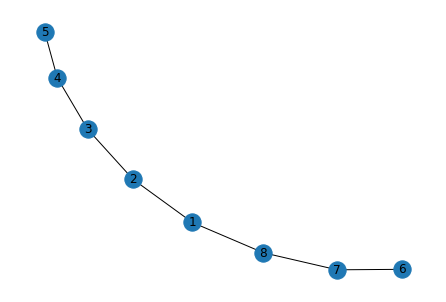

In [28]:
l2 = [ (1,2),(2,3),(3,4),(4,5),(6,7),(7,8), (8,1)]
Gtest = nx.Graph()
Gtest.add_edges_from(l2)
nx.draw(Gtest, with_labels = True)

In [30]:
#16
def is_Acyclic(G,s):
    F = []
    mark = {}
    pred = {}
    order = 1
    for i in G.nodes():
        mark[i] = -1
        pred[i] = s
    F.append(s)
    mark[s] = order #missing in the pseudocode
    
    while F:
        x = F.pop(0)
        #print(x, mark[x])
        for y in G.neighbors(x):
            if mark[y] == -1:
                F.append(y)
                order = order + 1
                mark[y] = order
                pred[y] = x
            elif pred[x] != y:
                #print(x, y, order)
                return False
    return True

In [31]:
print(is_Acyclic(Gtest, 4))
print(is_Acyclic(G, 1))
print(is_Acyclic(cG, 5))

True
False
False


In [77]:
#17 

G['B']['A']['weight']=4  #add a weight to the edge B-A
G.nodes[1]['color']='red' #adds a color to the node 1

In [76]:
print(G.nodes(data=True))

[(1, {'color': 'red'}), (2, {}), (3, {}), (4, {}), (5, {}), (6, {}), ('A', {}), ('B', {}), ('C', {}), ('D', {})]


In [78]:
print(G.edges(data=True))

[(1, 2, {}), (1, 6, {}), (2, 3, {}), (2, 6, {}), (3, 4, {}), (5, 6, {}), ('A', 'B', {'weight': 4}), ('A', 'D', {}), ('B', 'C', {}), ('B', 'D', {})]


In [41]:
#18

WG = nx.read_edgelist('./WG.txt', 
                      create_using = nx.DiGraph(), 
                      nodetype=str,
                      data= ( ('weight', int),) )

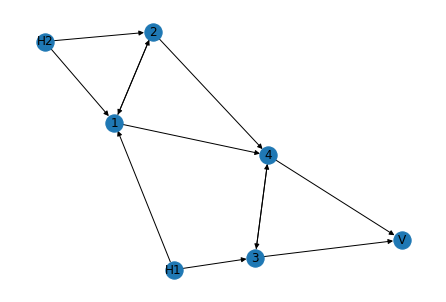

In [43]:
nx.draw(WG, 
        with_labels= True )

In [34]:
WG.edges(data=True)

OutEdgeDataView([('H1', '1', {'weight': 2}), ('H1', '3', {'weight': 8}), ('1', '2', {'weight': 1}), ('1', '4', {'weight': 5}), ('3', '4', {'weight': 2}), ('3', 'V', {'weight': 3}), ('H2', '1', {'weight': 7}), ('H2', '2', {'weight': 5}), ('2', '1', {'weight': 3}), ('2', '4', {'weight': 3}), ('4', '3', {'weight': 1}), ('4', 'V', {'weight': 5})])

In [35]:
#DIJIKSTRA
#19
length, path = nx.single_source_dijkstra(wG,'H1', 'V')
print("Length:", length,"  ,  Path:",  path)

Length: 10   ,  Path: ['H1', '1', '2', '4', '3', 'V']


In [44]:
print(nx.shortest_path(wG, 
                       source='H1', 
                       target='V', 
                       weight='weight') )
#print(nx.shortest_path(WG, source='H1', target='V') 

['H1', '1', '2', '4', '3', 'V']


In [4]:
net_Graph = nx.read_edgelist('network_graph.txt', create_using=nx.Graph(), nodetype=str, data=( ('BW', int), ) )

NameError: name 'nx' is not defined

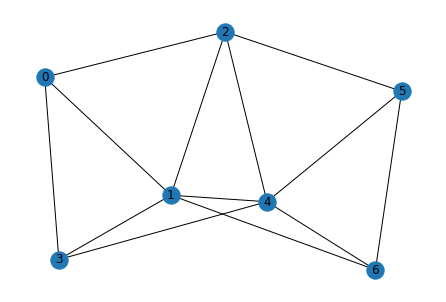

In [101]:
nx.draw(net_Graph, with_labels=True)

# Modified Dijikstra

In [2]:
def modified_Dijikstra(Gr, s, g):
    BW = {} #Bandwidth , dist in original algorithm
    final_BW ={}
    pred = {} #predecessor in final path
    
    BW[s] = float('inf')
    pred[s] = s
    
    for node in Gr.nodes - {s}:
        BW[node] = 0
        pred[node] = s
        
    V2 = set(Gr.nodes)
    i = 0
    temp_BW = BW

    while (len(V2)!=0): #do until V2 empty
        #Find the node with max BW in V2 
        temp_BW = { key:value for (key,value) in BW.items() if key in V2} 
        best_node = max(temp_BW, key=temp_BW.get) # node with max Banwidth in V2 
        for node in Gr.neighbors(best_node):
            if BW[node] < min( BW[best_node], float(Gr[best_node][node]['BW']) ):
                BW[node] = min(BW[best_node], float(Gr[best_node][node]['BW'])) 
                pred[node] = best_node
        V2 = V2 - {best_node}
    
    final_path =[]
    final_path.insert(0,g)
    
    prev = pred[g]
    while prev!= s:
        final_path.insert(0, prev)
        prev = pred[prev]
    final_path.insert(0,s)
    return final_path #, BW
    
    

In [3]:
print(modified_Dijikstra(net_Graph,'0','1') )
print(modified_Dijikstra(net_Graph,'0','3') )
print(modified_Dijikstra(net_Graph,'0','4') )


NameError: name 'net_Graph' is not defined

# Internet Analysis

In [17]:
internet_Graph = nx.read_edgelist('internet_graph.txt', create_using=nx.Graph(), nodetype=str, data=( ('cost', int), ) )

In [18]:
internet_Graph.nodes()

NodeView(('1', '3356', '11598', '3', '1239', '174', '10578', '4', '226', '567', '6', '702', '3215', '3549', '7', '786', '8', '2914', '4557', '9', '5050', '11', '1742', '12', '6517', '3754', '7018', '13', '668', '14', '6395', '209', '16', '293', '17', '19782', '18', '276', '6922', '20', '7011', '21', '22', '24', '10343', '297', '11537', '5511', '2153', '25', '2152', '2386', '26', '33207', '27', '10886', '6059', '29', '30', '31', '32', '71', '3671', '33', '2497', '6461', '6939', '3557', '5650', '34', '10466', '35', '5691', '37', '721', '38', '22335', '1224', '698', '6325', '7228', '40', '41', '42', '32978', '2516', '11608', '2874', '2905', '6453', '6539', '3066', '3257', '3303', '3491', '3856', '12956', '7091', '16150', '4589', '4637', '8674', '35160', '43', '45', '46', '11094', '4246', '19262', '16889', '31828', '47', '48', '49', '701', '50', '10490', '14209', '52', '55', '57', '7911', '7973', '32907', '8148', '1998', '33692', '25866', '6263', '217', '59', '2381', '63', '14742', '64', '

In [10]:
len(internet_Graph.nodes)

20305

In [21]:
is_connected(internet_Graph)

The Graph is connected.

The graph contains one component.


In [18]:
histDeg = nx.degree_histogram(internet_Graph)
print (len(histDeg)-1)

2398


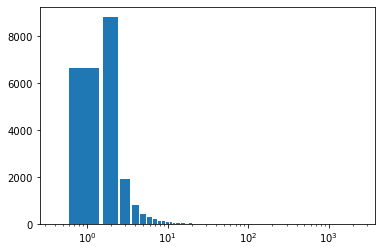

In [16]:
plt.xscale('log') 
plt.bar(range(len(histDeg)),histDeg) 
plt.savefig('scale_free_network.png')

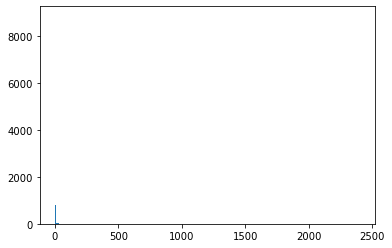

In [22]:
plt.bar(range(len(histDeg)),histDeg) 
plt.savefig('scale_free_network.png')

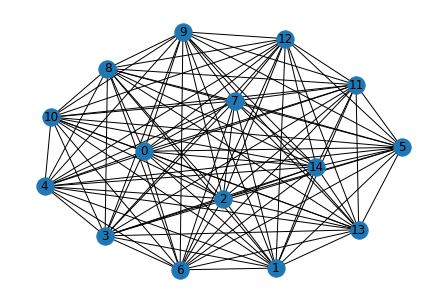

In [28]:
G2 = nx.random_geometric_graph(15, 10)
nx.draw(G2, with_labels=True)